# Is Man more crucial in the world of Philosophy?
##### Name: Xueying Chen
##### UNI: xc2578

# 1. Introduction
Philosophy is important becuase it can help us think critically. This project is to answer whether man is more important in the <i> History of Philosophy </i> or not. The meaning of Man in Philosophy is defined as human being and huaman nature. From "The Conception of Man in Existential Philosophy", <i> man is unity and a totality.</i> 

The dataset that I use to do analysis is holding at [kaggle](https://www.kaggle.com/kouroshalizadeh/history-of-philosophy). It contains about 300,000 sentences and 13 schools. The main techniques that I use to explore the data are WordCloud and Term Frequency — Inverse Document Frequency (TF-IDF).

In [50]:
import numpy as np
import pandas as pd
import nltk
import collections
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
import time
 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

# 2. Data Overview

In [52]:
df=pd.read_csv("/Users/carac./desktop/Fall2021-Project1-XYC67/data/philosophy_data.csv")
df.head()

title author school  \
0  Plato - Complete Works  Plato  plato   
1  Plato - Complete Works  Plato  plato   
2  Plato - Complete Works  Plato  plato   
3  Plato - Complete Works  Plato  plato   
4  Plato - Complete Works  Plato  plato   

                                      sentence_spacy  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

                                        sentence_str  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

   original_publication_date  corpus_edition_date  sentence_length  \
0                       -350                 1997              125   
1                       -350                 1997               69   
2                       -350                 1997               74   
3                       -350                 1997               21   
4                       -350                 1997              101   

                                    sentence_lowered  \
0   what's new, socrates, to make you leave your ...   
1  surely you are not prosecuting anyone before t...   
2  the athenians do not call this a prosecution b...   
3                              what is this you say?   
4  someone must have indicted you, for you are no...   

                                       tokenized_txt  \
0  ['what', 'new', 'socrates', 'to', 'make', 'you...   
1  ['surely', 'you', 'are', 'not', 'prosecuting',...   
2  ['the', 'athenians', 'do', 'not', 'call', 'thi...   
3               ['what', 'is', 'this', 'you', 'say']   
4  ['someone', 'must', 'have', 'indicted', 'you',...   

                                      lemmatized_str  
0     what be new , Socrates , to make -PRON- lea...  
1   surely -PRON- be not prosecute anyone before ...  
2   the Athenians do not call this a prosecution ...  
3                          what be this -PRON- say ?  
4   someone must have indict -PRON- , for -PRON- ...

In [66]:
print('The shape of dataset: ', df.shape)
print('Missing Values in dataset: ', df.isnull().sum().sum())

The shape of dataset:  (360808, 11)
Missing Values in dataset:  0


From the dataset Overview, we can see there are 360,808 rows and 11 columns, and there isn't missing values. The very first question that I asked myself: **How do I know gender is important in the philosophy?** I am going to filter out some colums that I think I may not need them during my porcesces. I mainly fouces on the *author*, *school*, *original_publication_date*, *corpus_edition_date*, and *sentence_lowered* because I would like to use **Word Clouds** to visual the most frequent words in each school.

# 3. Data Cleaning

In [63]:
# Remove sentence_spacy, sentence_str, 
final_df = df[['title','author','school', 'original_publication_date', 'corpus_edition_date', 'sentence_lowered']]
final_df.head()

title author school  original_publication_date  \
0  Plato - Complete Works  Plato  plato                       -350   
1  Plato - Complete Works  Plato  plato                       -350   
2  Plato - Complete Works  Plato  plato                       -350   
3  Plato - Complete Works  Plato  plato                       -350   
4  Plato - Complete Works  Plato  plato                       -350   

   corpus_edition_date                                   sentence_lowered  
0                 1997   what's new, socrates, to make you leave your ...  
1                 1997  surely you are not prosecuting anyone before t...  
2                 1997  the athenians do not call this a prosecution b...  
3                 1997                              what is this you say?  
4                 1997  someone must have indicted you, for you are no...

In [68]:
pd.DataFrame(final_df.groupby(by = ['title', 'author', 'school','original_publication_date', 'corpus_edition_date'])['title'].count())

title
title                                              author          school          original_publication_date corpus_edition_date       
A General Theory Of Employment, Interest, And M... Keynes          capitalism       1936                     2003                  3411
A Treatise Concerning The Principles Of Human K... Berkeley        empiricism       1710                     2009                  1040
A Treatise Of Human Nature                         Hume            empiricism       1739                     2003                  7047
Anti-Oedipus                                       Deleuze         continental      1972                     1997                  6679
Aristotle - Complete Works                         Aristotle       aristotle       -320                      1991                 48779
Being And Time                                     Heidegger       phenomenology    1927                     1996                  8505
Beyond Good And Evil                               Nietzsche       nietzsche        1886                     2003                  1906
Capital                                            Marx            communism        1883                     1887                 12996
Critique Of Judgement                              Kant            german_idealism  1790                     2007                  4204
Critique Of Practical Reason                       Kant            german_idealism  1788                     2002                  2452
Critique Of Pure Reason                            Kant            german_idealism  1781                     1998                  7472
Dialogues Concerning Natural Religion              Hume            empiricism       1779                     2009                  1265
Difference And Repetition                          Deleuze         continental      1968                     1994                  5861
Discourse On Method                                Descartes       rationalism      1637                     2008                   340
Ecce Homo                                          Nietzsche       nietzsche        1888                     2016                  1504
Elements Of The Philosophy Of Right                Hegel           german_idealism  1820                     1991                  4923
Enchiridion                                        Epictetus       stoicism         125                      2014                   323
Essay Concerning Human Understanding               Locke           empiricism       1689                     2004                  7742
Essential Works Of Lenin                           Lenin           communism        1862                     1966                  4469
Ethics                                             Spinoza         rationalism      1677                     2003                  3304
History Of Madness                                 Foucault        continental      1961                     2006                  8033
Lewis - Papers                                     Lewis           analytic         1985                     2008                 13120
Meditations                                        Marcus Aurelius stoicism         170                      2008                  2212
Meditations On First Philosophy                    Descartes       rationalism      1641                     2008                   792
Naming And Necessity                               Kripke          analytic         1972                     1990                  2681
Off The Beaten Track                               Heidegger       phenomenology    1950                     2001                  6734
On Certainty                                       Wittgenstein    analytic         1950                     1969                  1984
On The Improvement Of Understanding                Spinoza         rationalism      1677                     1997                   489
On The Principles Of Political Economy And Taxa...

# 4. Analysis

### 4.1 Connecting Publication Date with Hisotry

In [65]:
# The range of original and edtion date
print('The range of original publication date: ')
print([final_df['original_publication_date'].min(), final_df['original_publication_date'].max()] )
print('The range of corpus edition date: ')
print( [final_df['corpus_edition_date'].min(), final_df['corpus_edition_date'].max()])

The range of original publication date: 
[-350, 1985]
The range of corpus edition date: 
[1887, 2016]


From range of the original Publication data, It was starting from 350 to 1985. It reflects the culture that we are living is dominated by male. In the past, male had more opportunites to get eductions. Therefore, men has more opportunites to write philosophy and express their thougths and ideas.

### 4.2 WordCloud

School =  plato


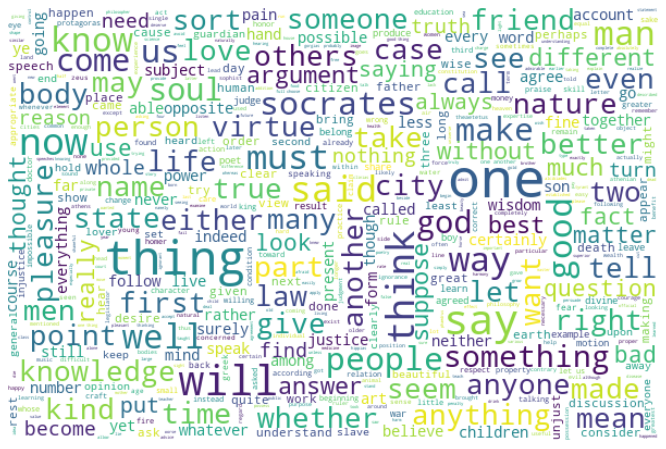

School =  aristotle


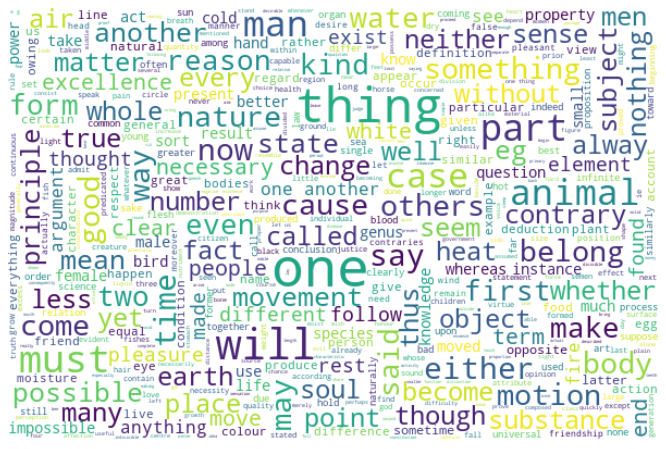

School =  empiricism


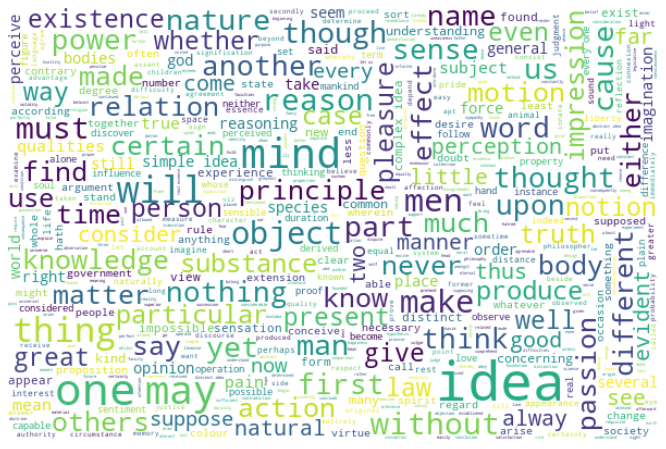

School =  rationalism


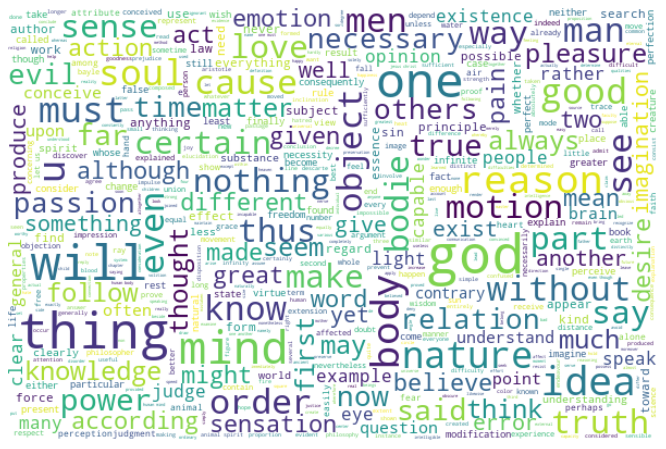

School =  analytic


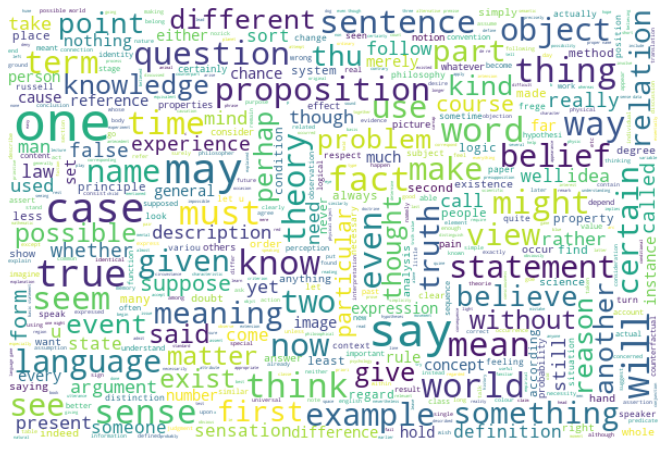

School =  continental


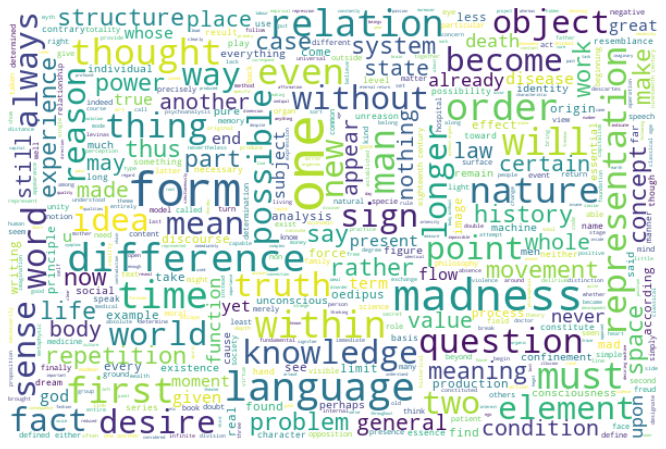

School =  phenomenology


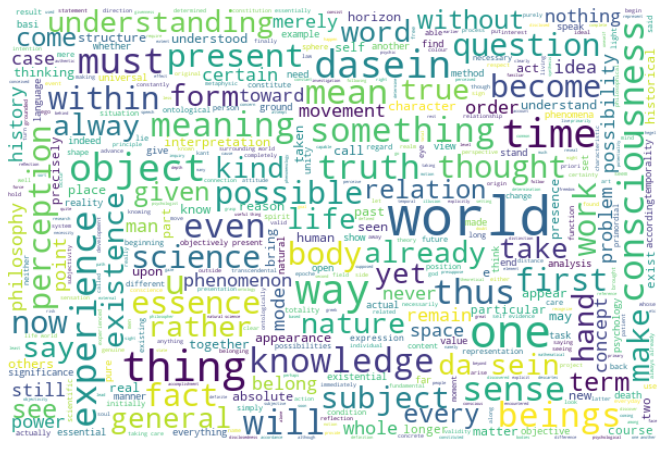

School =  german_idealism


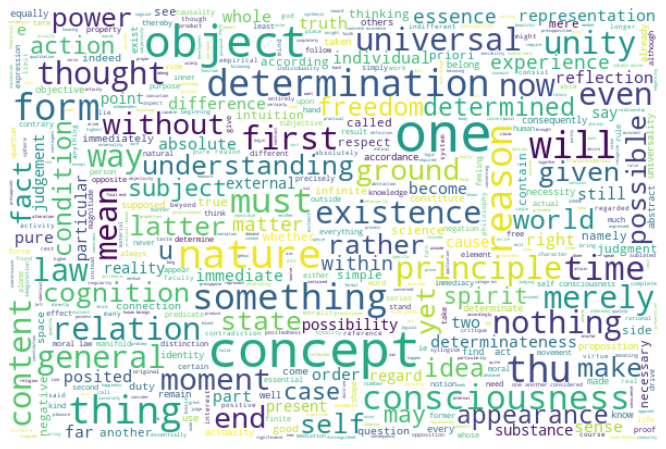

School =  communism


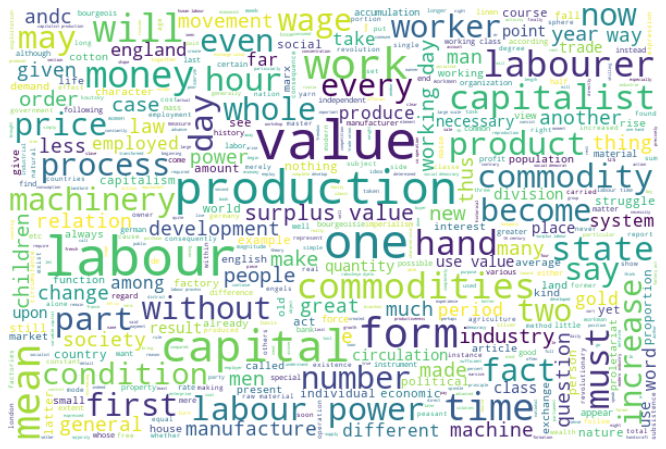

School =  capitalism


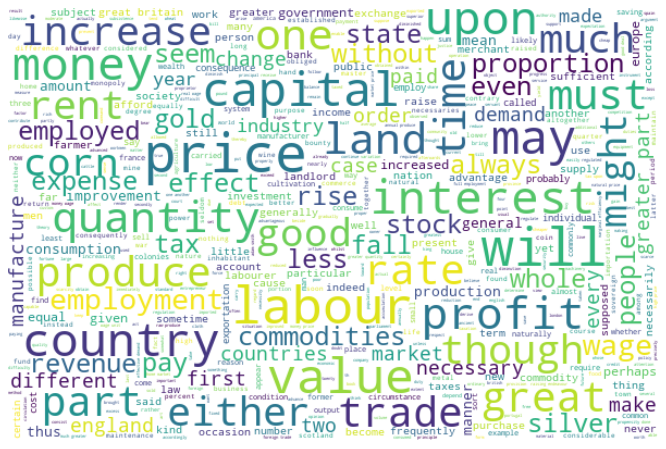

School =  stoicism


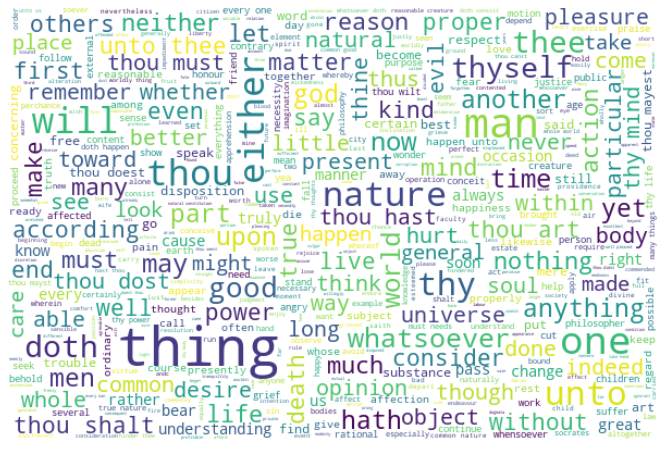

School =  nietzsche


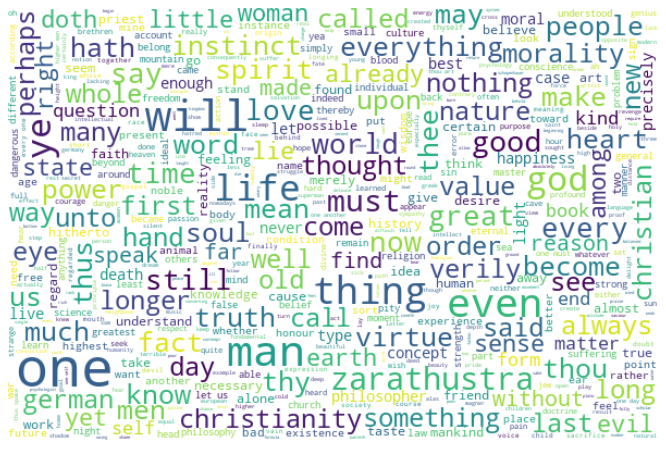

School =  feminism


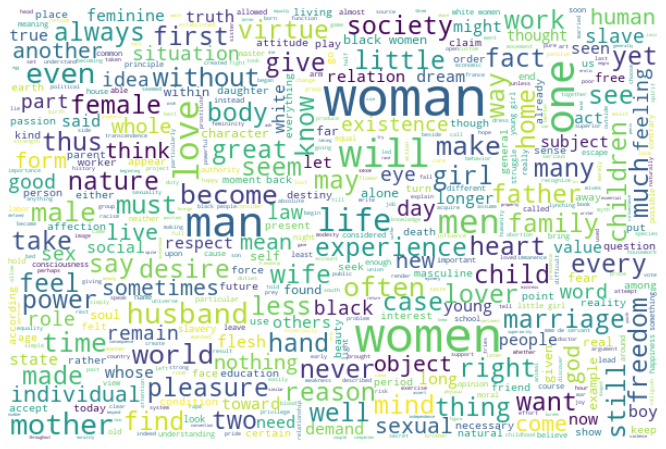

In [70]:
# need pip3 install wordcloud
# referencing from "https://www.kaggle.com/docxian/history-of-philosophy-eda-word2vec-model"
stopwords = set(STOPWORDS)
schools = final_df.school.unique().tolist()
for school in schools:
    new_df = df[df.school==school]
    
    print('School = ', school)
    words = " ".join(sentence for sentence in new_df.sentence_lowered)
    
    wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=500,
                          width = 600, height = 400,
                          background_color="white").generate(words)
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

From the above WordClouds, we can easily see "man" or "men" in each school's WordCloud expect for Capitalism and German_idealism. Man got mentioned a lot in those works. Other than "man", there are some words that got mentioned a lot as well such as "good", "think", "ting", and son on. Therefore, Man is important for Philosophy. Back to our history, man is the centrol of the world. He could help us to think correctly, acting as a good person, and do the righ things. 

### 4.3 TOP 10 words for each school

In [13]:
# Statistic for the top 10 words
# code is referening from "https://investigate.ai/text-analysis/counting-words-with-scikit-learns-countvectorizer/"
for school in schools:
    new_df = df[df.school==school]
    
    print('School = ', school, ':')
    text = " ".join(sentence for sentence in new_df.sentence_lowered)
    # print(type(words))
    vectorizer = CountVectorizer(stop_words='english')
    matrix = vectorizer.fit_transform([text])
    counts = pd.DataFrame(matrix.toarray(),
                      columns=vectorizer.get_feature_names())
    print(counts.T.sort_values(by=0, ascending=False).head(10))
    

School =  plato :
             0
things    2930
say       2672
said      2331
good      2263
man       2180
think     2177
just      1950
way       1926
socrates  1866
people    1725
School =  aristotle :
            0
things   4461
man      4125
thing    2905
does     2819
good     2627
animals  2508
time     2379
case     2305
like     2164
body     2058
School =  empiricism :
           0
ideas   3486
idea    2385
mind    1942
men     1580
man     1416
things  1270
reason  1189
nature  1174
make    1167
power    990
School =  rationalism :
           0
god     3534
things  2349
mind    2188
body    1829
nature  1539
good    1396
reason  1391
man     1319
soul    1297
order   1281
School =  analytic :
             0
say       3526
true      3055
sense     2518
does      2496
case      2381
theory    2138
know      1943
way       1915
language  1853
world     1835
School =  continental :
               0
madness     2283
form        1913
language    1630
time        1624
order       1

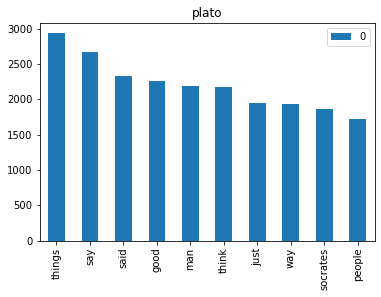

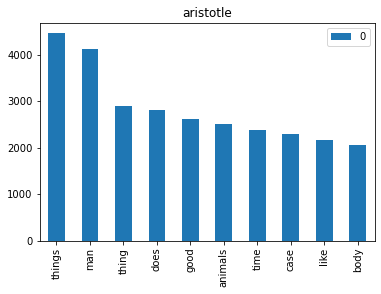

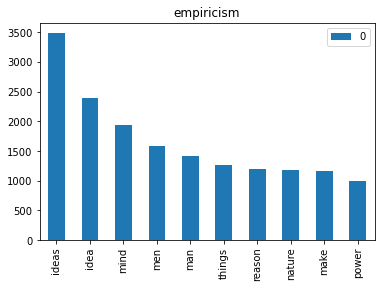

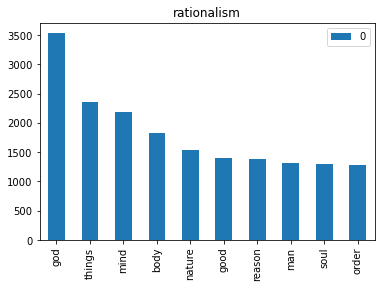

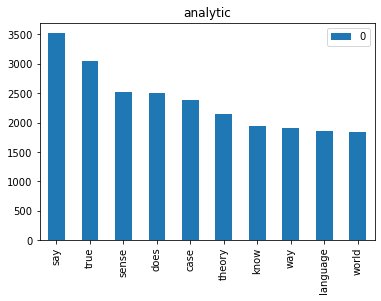

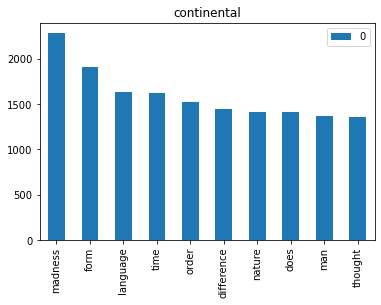

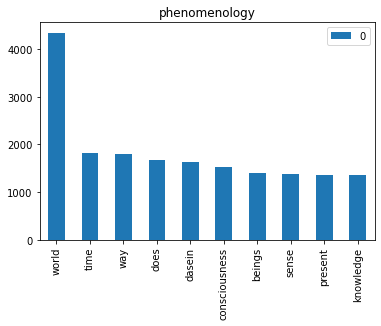

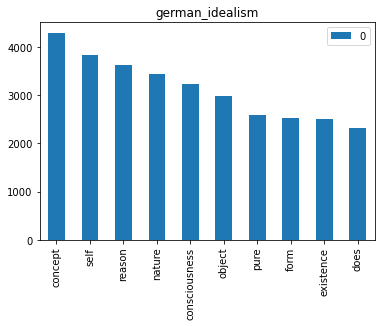

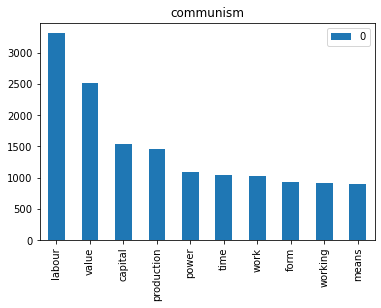

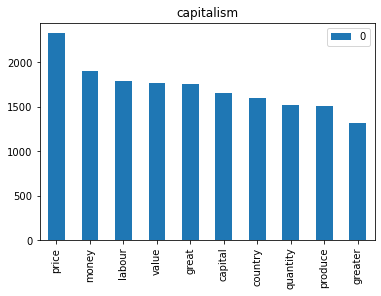

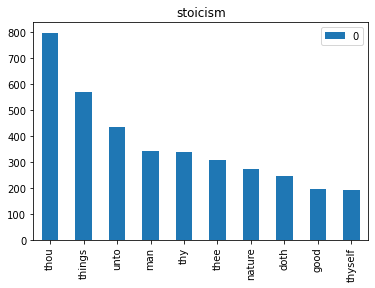

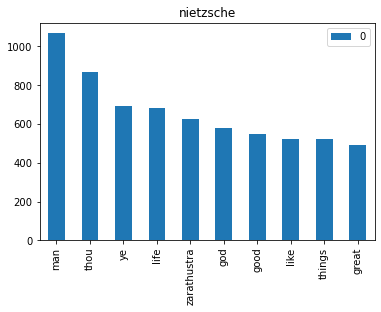

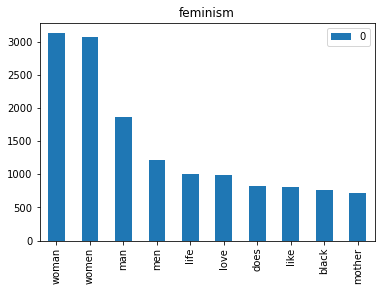

In [72]:
# graph top 10 words
for school in schools:
    new_df = df[df.school==school]
    text = " ".join(sentence for sentence in new_df.sentence_lowered)
    vectorizer = CountVectorizer(stop_words='english')
    matrix = vectorizer.fit_transform([text])
    counts = pd.DataFrame(matrix.toarray(),
                      columns=vectorizer.get_feature_names())
    top_10 = counts.T.sort_values(by = 0, ascending=False).head(10)
    top_10.plot(title = school, kind = 'bar')

From the above graphs, man is ranking 5th in Plato, second on Aristotle, 4th on Empiricism, 8th on Rationalism, 9th on Continental, 4th on Stoicism, 1st on Nietzsche and 3rd on Feminism.

### 4.4  TF-IDF 

School =  plato :
asending:           idf_weights
say          3.704849
things       3.707581
said         3.829623
think        3.894368
good         3.956053
man          3.980908
just         4.032553
way          4.036889
socrates     4.059967
people       4.149457
decending:               idf_weights
ψυχη            10.861806
resided         10.861806
remonstrates    10.861806
faintly         10.861806
fainthearted    10.861806
remotely        10.861806
remoter         10.861806
remotest        10.861806
removable       10.861806
rending         10.861806
School =  aristotle :
asending:          idf_weights
things      3.586039
man         3.750770
thing       3.985534
does        3.999018
animals     4.102962
case        4.149678
time        4.231356
like        4.245467
good        4.257646
way         4.259245
decending:             idf_weights
katatheis     11.101928
landanimal    11.101928
laments       11.101928
lametic       11.101928
laminar       11.101928
lampholder    1

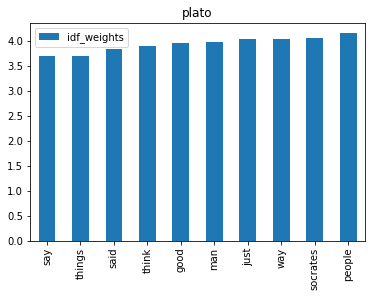

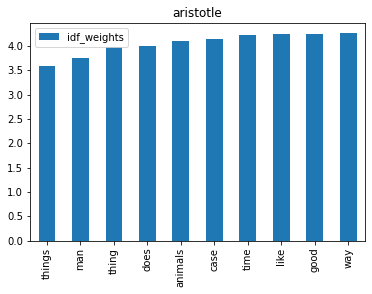

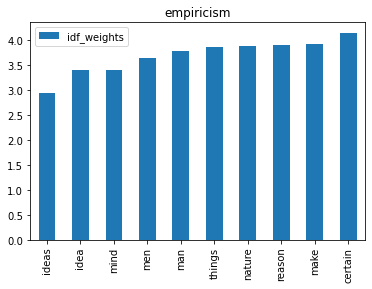

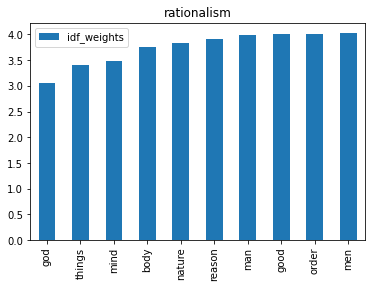

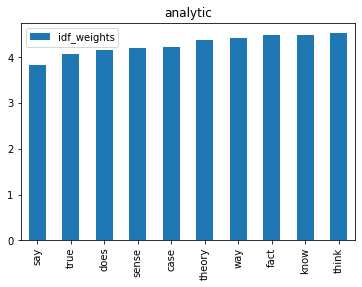

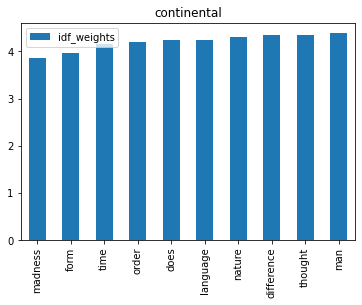

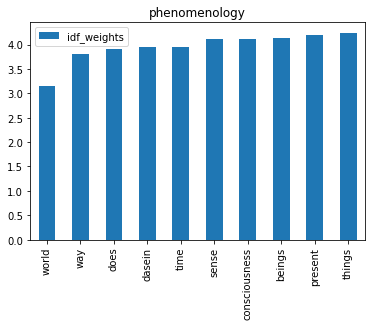

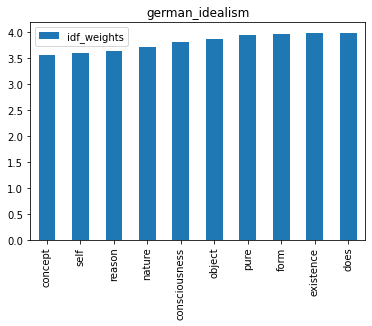

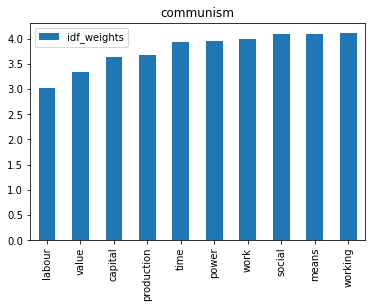

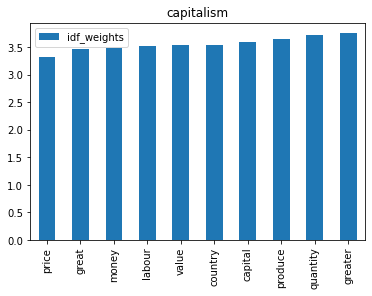

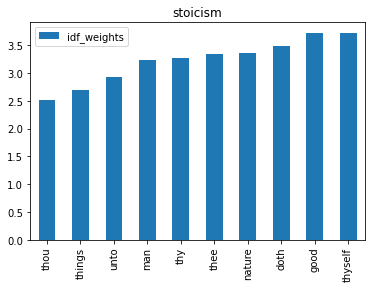

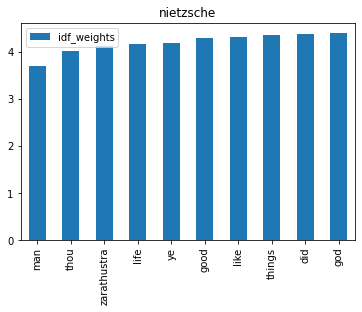

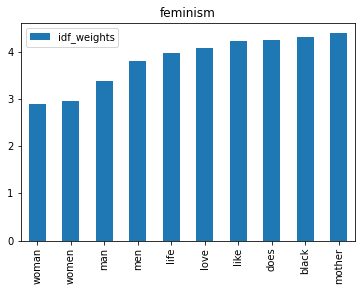

In [76]:
# code referencing from "https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.YVDK_mZucq0"
for school in schools:
    new_df = df[df.school==school]
    print('School = ', school, ':')
    cv=CountVectorizer(stop_words='english') 
    word_count_vector=cv.fit_transform(new_df.sentence_lowered)
    tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
    tfidf_transformer.fit(word_count_vector)
    df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 
    # sort ascending
    top_10_asending = df_idf.sort_values(by=['idf_weights'], ascending=True).head(10)
    top_10_decending = df_idf.sort_values(by=['idf_weights'], ascending=False).head(10)
    print("asending:", top_10_asending)
    print("decending:", top_10_decending)
    top_10_asending.plot(title = school, kind = 'bar')

From the above TF-IDF statistcs and graphs, idf_weight for a word is defined as the important of that word across the doucument. The lowest is meaning the most important. The idf_weight of 'man' belongs in the top 10 lowest level, which means "man" is significant in Pilosophy. The highest idf_weight is around 10 among very school. However, idf_weight of man is 3.9 on Plato, 3.75 on Aristotle, 3.6 on Empiricism, 3.98 on Rationalism, 4.39 on Continential, 3.24 on Stoicism, 3.6 on Nietzsche, and 3.39 on Feminism. We can conclude that "man" appears almost every school in our dataset.

# 5. Conclusion 

From the study of this philosophy dataset, I concluded that "man" is more important in world of Philosophy. It's a reflection of our history that man was dominating the world in the past. From human nataure to understand this question, it also can be that "man" is just a human being; it can help us to act and think critically. 